In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [5]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head(10)

,A,B,C
2016-07-01 00:00:00,1.275555,-1.852599,0.581764
2016-07-01 00:00:01,-0.309384,-0.333372,-2.637947
2016-07-01 00:00:02,0.962192,0.608516,0.127423
2016-07-01 00:00:03,0.280520,-0.925241,1.014255
2016-07-01 00:00:04,-0.339324,-0.347057,-1.167759
2016-07-01 00:00:05,1.433412,-1.950462,0.203772
2016-07-01 00:00:06,-0.896922,-0.334093,0.256321
2016-07-01 00:00:07,-0.047578,-0.962957,0.829068
2016-07-01 00:00:08,1.366974,-0.124596,-0.205333
2016-07-01 00:00:09,-0.157742,0.881386,0.674228


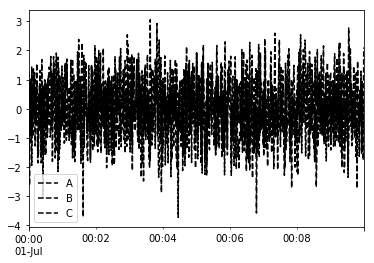

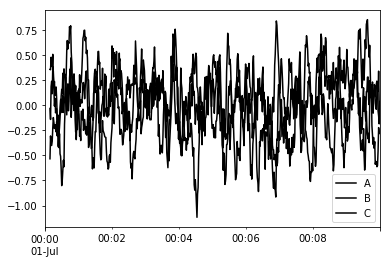

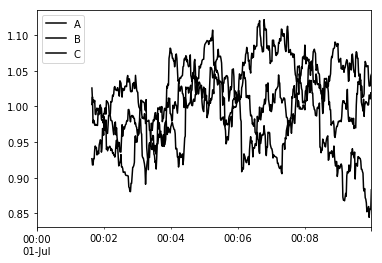

In [9]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')
df.rolling(window = 100).std().plot(style = 'k')

In [10]:
#exponentially weighted"
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/Users/alessandropapa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.430254,-1.042345,-1.135415
2016-07-01 00:00:02,0.631698,-0.417167,-0.657181
2016-07-01 00:00:03,0.525620,-0.570638,-0.152299
2016-07-01 00:00:04,0.303653,-0.513261,-0.412892
2016-07-01 00:00:05,0.559855,-0.839184,-0.273047
2016-07-01 00:00:06,0.260010,-0.735222,-0.164089
2016-07-01 00:00:07,0.201434,-0.778591,0.025043
2016-07-01 00:00:08,0.409762,-0.661696,-0.016134
2016-07-01 00:00:09,0.313500,-0.399953,0.100968


In [11]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [12]:
df.head()

,A,B,C,D
2016-06-06,2.531561,-0.275695,1.371360,-0.274428
2016-06-07,-0.004984,-0.201744,2.028023,-1.447357
2016-06-08,0.638961,-0.282503,-1.950410,-0.162234
2016-06-09,-0.758379,-0.218073,-0.570250,-1.094887
2016-06-10,-0.466728,-0.166891,-0.213071,-0.619437


array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c202710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118542cf8>], dtype=object)

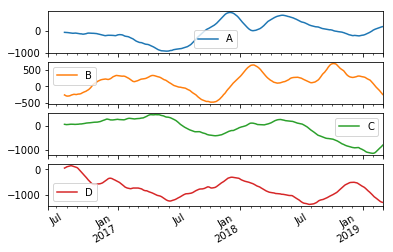

In [13]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [14]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,2.242773,1.309749,1.002079,0.980370


In [15]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,2.529070,-0.376567,2.385371,-0.998106
2016-06-08,2.741226,-0.504359,2.073238,-1.293410
2016-06-09,2.657709,-0.622773,1.774610,-1.714784
2016-06-10,2.514253,-0.727199,1.552818,-2.091496


In [ ]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
# Potentially less stable in iniital periods, more stable in later periods

In [ ]:
# EWMA
# Why use EWMA?
# For weighting more recent data more heavily than older data while avoiding discontinuities in the time seris

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

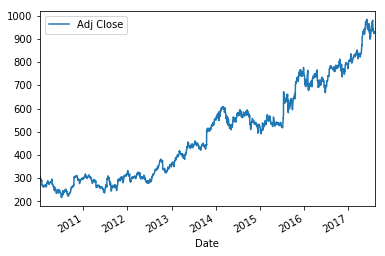

In [16]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
import pandas_datareader as pdr
test_import = pdr.get_data_yahoo('GOOG')
test_import.head(10)
test_import.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
test_import.plot()

/Users/alessandropapa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(halflife=50,min_periods=30,adjust=True,ignore_na=False).mean()
  after removing the cwd from sys.path.


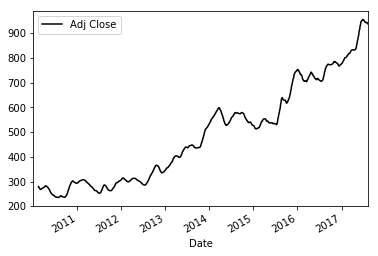

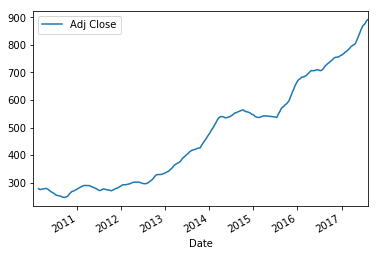

In [24]:
import matplotlib.pyplot as plt
r = test_import.rolling(window = 30)
r.mean().plot(style = 'k')
r_ewma = pd.ewma(test_import, halflife = 50, min_periods = 30)
r_ewma.plot()